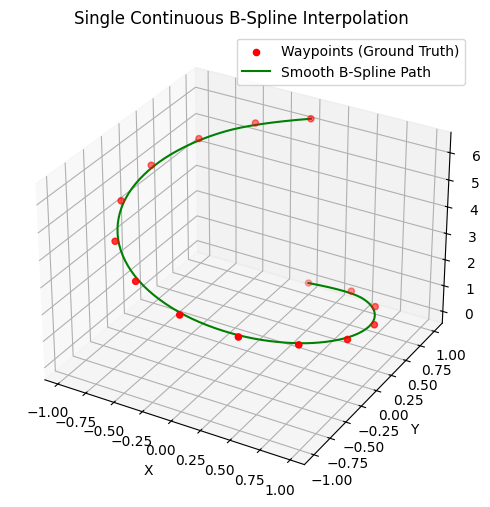

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline
from mpl_toolkits.mplot3d import Axes3D

# Generate a 3D trajectory (helix-like curve)
t = np.linspace(0, 2*np.pi, 15)  # Waypoints (discrete)
x = np.sin(t)  # Non-linear x
y = np.cos(t)  # Non-linear y
z = t          # Linear z component

degree = 2  # Quadratic B-spline
window_size = 3  # Number of control points per segment

# Use all waypoints to create a global B-spline
knots = np.concatenate(([t[0]] * degree, np.linspace(t[0], t[-1], len(t) - degree + 1), [t[-1]] * degree))
bspline_x = BSpline(knots, x, degree)
bspline_y = BSpline(knots, y, degree)
bspline_z = BSpline(knots, z, degree)

# Generate smooth values for the full trajectory
t_smooth = np.linspace(t.min(), t.max(), 100)
x_smooth = bspline_x(t_smooth)
y_smooth = bspline_y(t_smooth)
z_smooth = bspline_z(t_smooth)

# Plot results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot original waypoints
ax.scatter(x, y, z, color='r', label="Waypoints (Ground Truth)")

# Plot single continuous B-spline
ax.plot(x_smooth, y_smooth, z_smooth, 'g', label="Smooth B-Spline Path")

# Labels and legend
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Single Continuous B-Spline Interpolation")
ax.legend()

plt.show()
